In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

np.random.seed = 42

In [67]:
G = 1  # Gravitational constant
c = 1  # Speed of light

[[[ 0.64133374 -0.34500638]
  [ 0.71250983  0.86260517]
  [-0.15206319 -0.63305693]
  [ 0.61660181  0.88359865]
  [-0.42302468  0.80095763]
  [ 0.38297622  0.26445771]
  [ 0.43247508 -0.3637046 ]
  [ 0.23886631  0.92251258]
  [ 0.67769568 -0.68920153]
  [-0.32105268 -0.73669268]]]
(2.169456154121619, 0.25616856588647974)


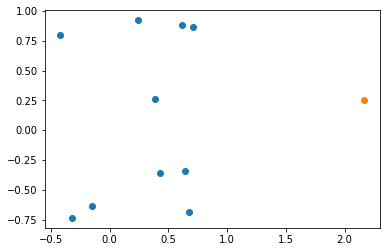

In [78]:
# Randomly distribute microlenses
N = 10
x = np.random.uniform(low=-1, high=1, size=N)
y = np.random.uniform(low=-1, high=1, size=N)

X = np.dstack((x, y))  # Lens positions
M = np.ones(N)  # Lens Masses

print(X)
CoM = ndimage.center_of_mass(X[0])  # Determine the center of mass of the distribution.
print(CoM)

plt.scatter(x, y)
plt.scatter(*CoM)

In [70]:
X[:, 1].shape

(1, 2)

In [63]:
def deflection_angle_point_masses(X, M):
    return 0